# <center>Rovnice mělké vody a Godunovova metoda</center>


<center><b>semestrální práce KMA/SNM2</b></center>
<center><b>Anežka Švandová a Honza Půlpán</b></center>
<br><br><br><br>

## Teoretický úvod

### Rovnice mělké vody
Saint-Venantovy rovnice, nebo také rovnice mělké vody (shallow water equations - SWEs), popisují proudění korytem řeky. My se zabýváme zjednodušeným případem, kdy předpokládáme koryto řeky s konstantním obdélníkovým průřezem. Jedná se tedy o jednodimenzionální úlohu ve tvaru

\begin{equation} \label{eq1}
\begin{bmatrix}
    h \\  
    hu \\ 
\end{bmatrix}_{t} +
\begin{bmatrix}
    uh \\
hu^{2}+ \textstyle \dfrac{1}{2}gh^{2}
\end{bmatrix}_{x} = 0,
\end{equation}

kde $h=h(x,t)$ reprezentuje hledanou hloubku, $u=u(x,t)$ horizontální rychlost a $ g $ je gravitační konstanta. 

Obecněji úlohů můžeme zapsat jako nelineární systém hyperbolických parciálních diferenciálních rovnic ve tvaru zákona zachování

\begin{equation}
q_{t}+f(q)_{x}=0,
\end{equation}

kde $q(x,t)=\begin{bmatrix}h \\ hu \end{bmatrix}$ a $f(q)=\begin{bmatrix} uh \\ hu^{2}+ \textstyle \dfrac{1}{2}gh^{2}\end{bmatrix}$. 

Všechny následující úvahy počítají s nelineárním systémem hyperbolických parciálních diferenciálních rovnic.

### Riemannův problém
Obecnou počáteční úlohu s nespojitou počáteční podmínkou nazýváme Riemannův problém. V případě Saint-Venantových rovnic se může jednat například o tzv. problém rozbití přehrady (dam-break problem)

\begin{equation}
\left\{
    \begin{split}
    &q_{t}+f(q)_{x}=0, & \text{ kde }x\in[0,1], t\in(0,T)\\
    &q(x,0)=q_{0}(x)= &\begin{cases} q_{l} \quad \text{ pro }\quad x<x_{0} \\ q_{r} \quad \text{ pro } \quad x>x_{0}\\ \end{cases}, \quad\text{ kde } x_{0}\in \mathbb{R},\\
    \end{split}
    \right.
\end{equation}


kde $q_l$ a $q_r$ jsou konstanty.

Riemannův problém řešíme pomocí přesného, nebo v některých případech přibližného Riemannova řešiče. Na vstupu očekává Riemannův řešič hodnoty $q_l$ a $q_r$, výstupem je množina $p$ vln $\mathcal{W}^p_{i-1/2}$ a jejich rychlostí $s^p_{i-1/2}$.

### Godunova metoda

Godunova metoda je explicitní numerická metoda pro řešení parciálně diferenciálních rovnic, založená na metodě konečných objemů. Toky na hranicích kontrolních objemů stanovuje pomocí Riemannových řešičů.

Godunovova metoda nabývá tvaru
$$Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(F_{i+1/2}^{n}-F_{i-1/2}^{n}\right).$$

#### Algoritmus Godunovy metody
1. Definujeme uniformní síť bodů $$x_{i}=i\Delta x,\, i = 0,1,\dots N_{x}\in\mathbb{N},$$ 
$$t_{n}=n\Delta t, \, n = 0,1,\dots N_{n}\in\mathbb{N},$$ 
kde $\Delta x > 0 $, $ \Delta t > 0$ jsou námi zvolené prostorové a časové diskretizační kroky. Kontrolní objemy v jednotlivých časových diskretizačních vrstvách jsou pak dány hraničními body $x_{i\pm 1/2}=x_{i}\pm\Delta x/2$.

2. Zkonstruujeme funkci integrálních průměrů přes jednotlivé kontrolní objemy $Q^{n}(x)$. Ta aproximuje řešení v $n$-té časové diskretizační vrstvě a je po částech konstatní s Riemanovy problémy v bodech nespojitosti.

3. Riemannovy problémy na hranicích kontrolních objemů řešíme pomocí přibližných Riemanových řešičů. Získáme vektory vln  $\mathcal{W}^{p}_{i-1/2}$ a jejich rychlostí $s^{p}_{i-1/2}$ pro celou síť. 


4. Vypočteme toky na hranicích kontrolních objemů $F_{i\pm 1/2}^{n}$

\begin{align} 
    &F_{i-1/2}^{n} = A^{+}\Delta Q_{i-1/2}=\sum_{p}(s^{p}_{i-1/2})^{+}\mathcal{W}^{p}_{i-1/2}, \\ 
    &F_{i+1/2}^{n} = A^{-}\Delta Q_{i+1/2}=\sum_{p}(s^{p}_{i+1/2})^{-}\mathcal{W}^{p}_{i+1/2} 
\end{align}

5. Určíme hodnoty $Q_i$ pro následující časovou vrstvu

$$Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(F_{i+1/2}^{n}-F_{i-1/2}^{n}\right).$$

Kroky 2.-5. opakujeme až do časové diskteritzační vrstvy $t_{N_{t}}=T$.


#### Vlastnosti metody

Godunovova metoda je prvního řádu. Vztah 

$$Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(F_{i+1/2}^{n}-F_{i-1/2}^{n}\right)$$

je v konzervativním tvaru a lokální chyba $L_{i}^{n}\rightarrow 0$ pro $\Delta t \rightarrow 0$ za předpokladu $T\geq n\Delta t$.
Tj. Godunova metoda je __konzervativní__ a __konzistentní__. 

Aby bylo zaručeno, že se sousedící Riemannovy problémy neovlivňují a jsme tak schopni vypočítat správné integrální průměry, musí platit CFL podmínka

$$ \frac{s_{max}\Delta t}{\Delta x} \leq 1,$$

kde $s_max$ je maximální hodnota rychlosti vlny získaná Riemannovým řešičem. Levou stranu nerovnosti nazýváme Courantovo číslo.

Neumíme dokázat, že Godunovova metoda pro nelineární systémy obecně konverguje. Přesto lze tuto metodu s úspěchem používat.

- TOHLE FUNGUJE JEN PRO LINEÁRNÍ ÚLOHY, TU MY NEMÁME CFL: $max|\lambda_{i}|\frac{\Delta t}{\Delta x}\leq 0$ (Laxova věta: konzistence+stabilita -> konvergence)

### Godunova metoda vyššího řádu

LEVEQUE STR. 121

Godunova metoda druhého řádu (High-Resolution method):
\begin{align} &Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(A^{+}\Delta Q_{i-1/2}-A^{-}\Delta Q_{i+1/2}\right)-\frac{\Delta t}{\Delta x}\left(\tilde{F}_{i+1/2}-\tilde{F}_{i-1/2}\right), \\
&\tilde{F}_{i-1/2} = \frac{1}{2}\left|s_{i-1/2}\right|\left(1-\frac{\Delta t}{\Delta x}\left|s_{i-1/2}\right|\right)\tilde{W}_{i-1/2}, \\ &\tilde{F}_{i+1/2} = \frac{1}{2}\left|s_{i+1/2}\right|\left(1-\frac{\Delta t}{\Delta x}\left|s_{i+1/2}\right|\right)\tilde{W}_{i+1/2},\end{align}

kde $\tilde{W}_{i\pm 1/2}$ reprezentuje limitní verzi vlny $W_{i\pm 1/2}$ získanou záměnou $W^{p}_{i-1/2}$ za $W^{p}_{i-3/2}$ pro $s^{p}>0$, nebo $W^{p}_{i+1/2}$ pro $s^{p}<0$. 

__Vlastnosti metody:__
- opět v konzervativnim tvaru
- lokalni chyba jde opet k nule
- CFL podmínka LeV str 68
- jediná zmena vyšší řád -> zpusobuje oscilace


## Numerické experimenty

Úlohu mělké vody popsanou v první kapitole řešíme pomocí Godunovovy metody s použitím různých (přibližných) Riemannových řešičů a také s odvozenými metodamy vyšších řádů. Jednotlivé numerické metody porovnáme a to jak výsledné řešení, tak i jeho závislost na dělení na kontrolní objemy a také na CFL podmínce. 

Pro všechny numerické testy volíme jednotnou počáteční podmínku ve tvaru "dam break" a to i z důvodu, že známe přesné analytické řešení. Jsme tedy schopni řešení snadno porovnat a stanovit i jeho přesnou chybu.

Přibližné i přesné Riemannovy řešiče pro SWE úlohu stejně jako i limitery použité později v metodách vyššího řádu jsou převzaty z balíku Clawpack (linky). Přibližné Riemannovy řešiče jsou v souboru *riemann.py*, přesný řešič v souboru *exact_riemann_solution.py* a limitery v souboru *tvd.py*.

In [9]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from shallow_water import exact_riemann_solution
import tvd
from riemann import shallow_roe_1D, shallow_hll_1D



plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (20,7)
plt.rcParams['font.size'] = '12'

Pro naši úlohu nastavíme základní parametry jako je velikost gravitační konstanty a interval na kterém úlohu řešíme. 

Následující 2 python funkce pak nastavují počáteční podmínku a řeší SWE úlohu pro nastavené parametry. Funkce *shallow_ic()* nastaví jednu z vybraných počátečních podmínek. Na výběr je "dam break", funkce se 2 skoky, sinus a sinus se skokem uprostřed. 

Funkce *shallow_sol()* úlohu SWE řeší, případně i vykreslí řešení. Většina parametrů je nastavena v rozumných defaultních hodnotách, všechny jsou ale přenastavit podle potřeby. Počáteční podmínka může být také jakákoliv, funkce *shallow_ic()* je jen "helper", abychom nemuseli počáteční podmínku konstruovat pořád dokola.

In [10]:
# constants
grav = 9.81

# domain
# x-coordinate, centered around 0
x_start = -1.
x_end = 1.

# initial condition setup
# tohle chce předělat na nějaké obecnější funkce
def shallow_ic(N, ic_type=1):
    '''
    Initial condition type:
    
    1 ... step in half domain
    2 ... 2 steps in domain
    3 ... sinus
    '''
    
    q_state = np.zeros([2,N])
    
    if ic_type == 3:
        q_state[0,:] = .1 * np.sin(np.linspace(0,4*np.pi,N)) +1
    elif ic_type==4:
        q_state[0,:] = .1 * np.sin(np.linspace(0,4*np.pi,N)) +1
        q_state[0,:int(N/2)] = q_state[0,:int(N/2)] + 2 
    
    elif ic_type == 2:
        for i in range(N):
            if i < N/3:
                q_state[0,i] = 5
            elif N/3 <= i < 2*N/3:
                q_state[0,i] = 3
            else: 
                q_state[0,i] = 1
            
    else:
        q_state[0,0:int(N/2)] = 4
        q_state[0,int(N/2):] = 1

    return q_state

# shallow water system solution
def shallow_sol(q_state,
                x_start=-1.,
                x_end=1.,
                N=200,
                T=.05,
                Nt=50,   
                riemann_solver=shallow_roe_1D,
                higher_order = False,
                limiter=tvd.minmod,
                exact_q=False,
                plot_sol=False,
               ):
    
    # problem_data
    problem_data = {'grav' : grav,
               'efix' : False}
    
    # x axis for plots
    x = np.linspace(x_start, x_end, N)
    
    # size of spatial and time steps
    dx = (x_end-x_start)/N # 0.005 #
    dt = T/Nt
    dtdx = dt/dx
    
    aux_l, aux_r = 0, 0
    limiters = np.full(N,limiter)
    
    #maximalni rychlost
    s_max = np.zeros(Nt)
    
    # iterate solution for Nt time steps
    for i in range(Nt):
        q_l = q_state[:,:-1]
        q_r = q_state[:,1:]

        # solve Riemann problems at all faces 
        wave, s, amdq, apdq = riemann_solver(q_l, q_r, aux_l, aux_r, problem_data)
        s_max[i] = np.nanmax(np.abs(s))

        # update state with Riemann solutions
        q_state[:,:-1] = q_state[:,:-1] - dtdx * amdq
        q_state[:,1:] = q_state[:,1:] - dtdx * apdq
        
        # in case of higher order solution
        if higher_order:
            dtdx_array = np.full(N, dtdx)

            #wave limiting
            wave_lim = tvd.limit(2,wave,s,limiters,dtdx_array)
            
            F = np.zeros([2,N-1])
            w_num = wave.shape[1]
            
            #fluctuation correction F calculation
            F[0,:] = 1/2. * np.sum(np.abs(s)*(1-dtdx*np.abs(s))*wave_lim[0,:,:],axis=0)
            F[1,:] = 1/2. * np.sum(np.abs(s)*(1-dtdx*np.abs(s))*wave_lim[1,:,:],axis=0)

            #fluctuation correction F added to state
            # takhle se mi to zdá správně, protože je to duhé F skutečně posunuté na i+1/2
            # sice to kmitá, ale to by asi mělo. A mělo by to jít vyrovnat pomocí jemnějšího dělení
            q_state[:,:-1] = q_state[:,:-1] + dtdx * F
            q_state[:,:-2] = q_state[:,:-2] - dtdx * F[:,1:]

    #print(f'N: {N}, Nt: {Nt}, T: {T}, dx: {dx}, dt: {dt}, CFL: {np.max(s_max)*dtdx}')
    cfl = np.max(s_max)*dtdx
    if exact_q:
        E = np.sum(np.abs(q_state[1]-exact_q(x/T)[1]))*dx
    else:
        E = False
    
    # solution plot 
    if plot_sol:
        plt.subplot(1, 2, 1)
        plt.plot(x, q_state[0,:], 'bx:')
        plt.subplot(1, 2, 2)
        plt.plot(x, q_state[1,:] / q_state[0,:], 'rx:')
        plt.show()
    
    return q_state, x, cfl, E

Pro analýzu jednotlivých Godunových metod, přibližných Riemannových řešičů a limiterů si nejprve napočítáme všechny úlohy pro různá prostorová dělení sítě $Ns$ a pro různé metody jejichž parametry jsou uložené v poli *methods*.

In [3]:
results = []

methods = [['1-Roe',shallow_roe_1D, False, False],
           ['1-hll',shallow_hll_1D, False, False],
           ['2R-minmod',shallow_roe_1D, True, tvd.minmod],
           ['2R-superbee',shallow_roe_1D, True, tvd.superbee],
           ['2R-mc',shallow_roe_1D, True, 4],
           ['2R-Arora-Roe',shallow_roe_1D, True, 11],
           ['2h-minmod',shallow_hll_1D, True, tvd.minmod],
           ['2h-superbee',shallow_hll_1D, True, tvd.superbee],
           ['2h-mc',shallow_hll_1D, True, 4],
           ['2h-Arora-Roe',shallow_hll_1D, True, 11],
          ]

Ns = [20, 100, 400, 900, 1060]

# vnější cyklus pro metody
_, _, exact_sol, _ = exact_riemann_solution([4.,0],[1.,0], grav=grav)
for i in range(len(methods)):
    
    met_result = []
    # vnitřní cyklus pro N 
    for j in range(len(Ns)):
        Q_init = shallow_ic(Ns[j], 1)
        Qs, x, cfl, E = shallow_sol(Q_init, 
                N = Ns[j],
                Nt=200,
                riemann_solver=methods[i][1],
                higher_order=methods[i][2],
                limiter=methods[i][3],
                exact_q = exact_sol,
                )        
        met_result.append([cfl, E, Qs, x])
    results.append([methods[i][0]]+met_result)


### Závislost řešení na prostorovém dělení

Z teoretické části předpokládáme, že řešení se bude zpřesňovat při zvětšení počtu kontrolních objemů a tím pádem zmenšení $\Delta x$. To potvrzují i naše numerické experimenty. V grafech je zobrazena závislost řešení na počtu kontrolních objemů prostorové proměnné pro dvě vybranné metody. Na prvních grafech je řešení pro Godunovovu metodu prvního řádu s Roeovým přibližným Riemannovým řešičem. Na druhém pro metodu druhého řádu s minmod limiterem.

Z vykreslených řešení je vidět, že zjemnění sítě zpřesňuje numerické řešení. Pro metodu druhého řádu jsou patrné oscilace, které v metodě prvního řádu "vyhladí" numerická difuze. I přesto je ale chyba řešení v metodě druhého řádu nižší, jak uvidíme níže.

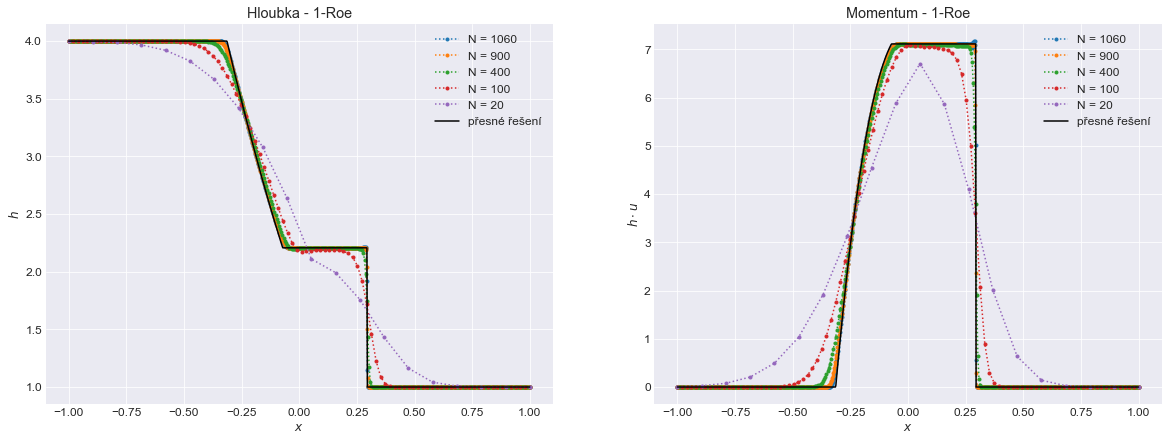

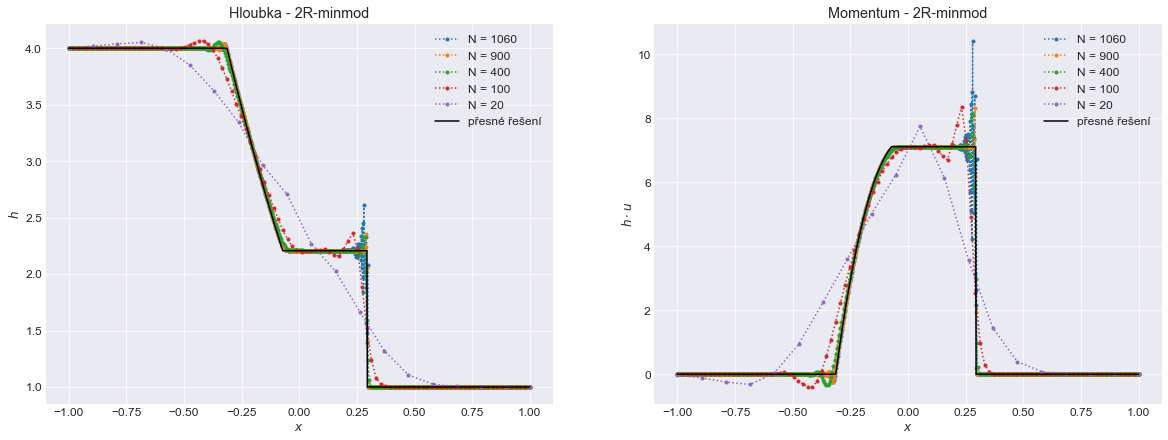

In [4]:
#GM1 Roe
#GM2 Roe minmod

ms = [0,2]
for m in ms:
    
    for i in range(len(Ns),0,-1):
        plt.subplot(1,2,1)
        plt.plot(results[m][i][3],results[m][i][2][0],'.:',label = f'N = {Ns[i-1]}')
        plt.legend()
        plt.xlabel('$x$')
        plt.ylabel('$h$')
        plt.title(f'Hloubka - {results[m][0]}')
        plt.subplot(1,2,2)
        plt.plot(results[m][i][3],results[m][i][2][1],'.:',label = f'N = {Ns[i-1]}')
        plt.legend()
        plt.xlabel('$x$')
        plt.ylabel('$h\cdot u$')
        plt.title(f'Momentum - {results[m][0]}')
    plt.subplot(1,2,1)
    plt.plot(x, exact_sol(x/.05)[0], 'k', label = 'přesné řešení')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, exact_sol(x/.05)[1], 'k', label = 'přesné řešení')
    plt.legend()
    plt.show()

# vetší N, přesnější řešení

### Porovnání různých metod

- porovnat metody
- rozdíl mezi 1. a 2. řádem
- proč 2 řád kmitá
- jaký je rozdíl v limitrech




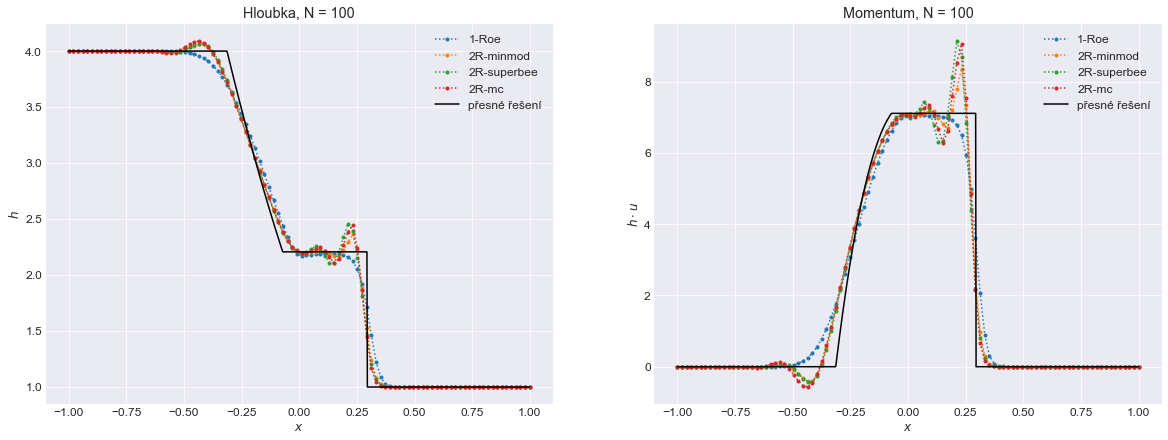

In [5]:
n=2
#ms = [0,1,2,4,6,8]
ms = [0,2,3,4]

for m in ms:
    plt.subplot(1,2,1)
    plt.plot(results[m][n][3],results[m][n][2][0],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h$')
    plt.title(f'Hloubka, N = {Ns[n-1]}')
    plt.subplot(1,2,2)
    plt.plot(results[m][n][3],results[m][n][2][1],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h\cdot u$')
    plt.title(f'Momentum, N = {Ns[n-1]}')
plt.subplot(1,2,1)
plt.plot(x, exact_sol(x/.05)[0], 'k', label = 'přesné řešení')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x, exact_sol(x/.05)[1], 'k', label = 'přesné řešení')
plt.legend()
plt.show()

#upwind má numerickou difuzi -> vyhlazuje -> nekmitá narozdíl od druhého řádu - rozdíl

- jednotlivé přibližné Riemannovy řešiče se prakticky neliší
- na obrázku je detail pro Roe a hll


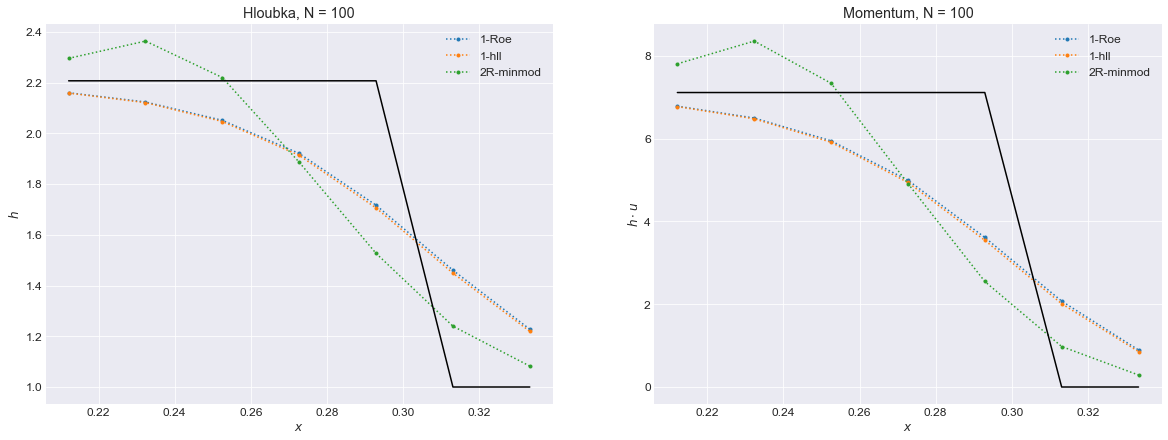

In [6]:

n=2
ms = [0,1,2]
imin, imax = 60, 67

for m in ms:
    plt.subplot(1,2,1)
    plt.plot(results[m][n][3][imin:imax],results[m][n][2][0][imin:imax],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h$')
    plt.title(f'Hloubka, N = {Ns[n-1]}')
    plt.subplot(1,2,2)
    plt.plot(results[m][n][3][imin:imax],results[m][n][2][1][imin:imax],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h\cdot u$')
    plt.title(f'Momentum, N = {Ns[n-1]}')
plt.subplot(1,2,1)
plt.plot(results[0][n][3][imin:imax], exact_sol(results[0][n][3][imin:imax]/.05)[0], 'k', label = 'přesné řešení')    

plt.subplot(1,2,2)
plt.plot(results[0][n][3][imin:imax], exact_sol(results[0][n][3][imin:imax]/.05)[1], 'k', label = 'přesné řešení')   
plt.show()



Vzhledem k tomu, že k naší úloze máme k dispozici i přesné řešení, můžeme snadno vypočítat i globální sikretizační chybu danou vztahem

$$E = \sum_{j=1}^N\left|Q^T_j-q(x_j,t_T)\right|$$

Na dalším grafu je porovnána chyba $E$ pro různé dělení $N$ a různé metody. Opět je vidět, že se chyba pro zjemňující se dělení zmenšuje. Zároveň je chyba $E$ menší pro metody 2. řádu. Pro nejjemnější dělení, kdy $N=1060$, je ovšem již porušena CFL podmínka a chyba $E$ se zvětšuje. U některých metod dokonce velmi razantně.

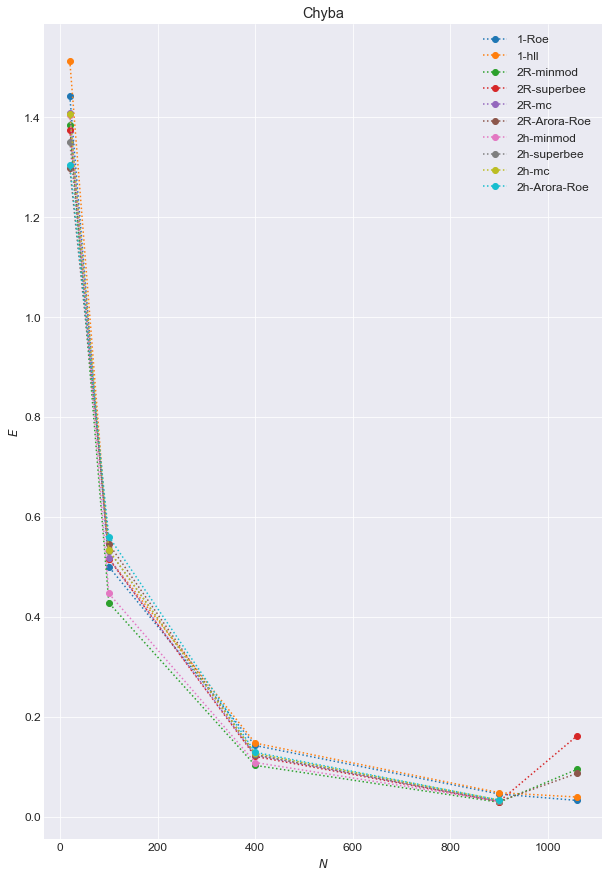

In [7]:
#print(results[0][2])
# metoda, N=[20,100,300,1060], [cfl,E,Q,x]
plt.figure(figsize=(10,15))
for m in range(len(results)): 
    plt.plot(Ns,[results[m][1][1],results[m][2][1],results[m][3][1],results[m][4][1],results[m][5][1]],'o:',label = f'{results[m][0]}')
plt.xlabel('$N$')
plt.ylabel('$E$')
plt.title(f'Chyba')
plt.legend()
plt.show()


### Výsledky

V tabulce jsou shrnuty výsledky pro všechny použité metody a dělení $N$. Velikost CFL je maximální hodnota v průběhu výpočtu a to jak v prostoru tak v čase. $E$ je globální diskretizační chyba.

- co z tabulky vidíme
- větší N znamená větší CFL ale pokud je (přibližně pod 1) tak i menší chybu E
- metody 2. řádu mají menší chybu (až do 700)
- proč některé metody fungují i pro CFL>1?


In [22]:
table_width = 135
print(f'-'*table_width)
print(f'|                  |   {Ns[0]:^18} |   {Ns[1]:^17}  |   {Ns[2]:^17}  |   {Ns[3]:^17}  |   {Ns[4]:^17}  |')
print(f'|      Metoda      | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} |')
print(f'-'*table_width)
for i in range(len(results)):
    last = '{:7.4f}'.format(results[i][5][0]) if results[i][5][0] < 99 else ">99"
    print(f'|  {results[i][0]:14}  | {results[i][1][0]:7.4f} | {results[i][1][1]:10.4e} | {results[i][2][0]:7.4f} | {results[i][2][1]:10.4e} | {results[i][3][0]:7.4f} | {results[i][3][1]:10.4e} | {results[i][4][0]:7.4f} | {results[i][4][1]:10.4e} | {last:>7} | {results[i][5][1]:10.4e} |')
    
print(f'-'*table_width)

---------------------------------------------------------------------------------------------------------------------------------------
|                  |           20         |          100         |          300         |          700         |         1060         |
|      Metoda      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |
---------------------------------------------------------------------------------------------------------------------------------------
|  GM1-Roe         |  0.0189 | 1.4425e+00 |  0.0984 | 5.0052e-01 |  0.2954 | 1.9000e-01 |  0.6889 | 7.0146e-02 |  1.0441 | 3.2529e-02 |
|  GM1-hll         |  0.0189 | 1.5131e+00 |  0.0983 | 5.1671e-01 |  0.2953 | 1.9582e-01 |  0.6889 | 7.3422e-02 |  1.0747 | 3.9311e-02 |
|  2R-minmod       |  0.0195 | 1.3855e+00 |  0.1033 | 4.2822e-01 |  0.3109 | 1.3647e-01 |  0.7190 | 4.5156e-02 |  1.0972 | 9.4670e-02 |
|  2R-superbee     |  0.0196 | 1.3744e+00 |  0.1

### Jiná počáteční podmínka

- jen pro ukázku, metoda je obecná
- sinus se skokem


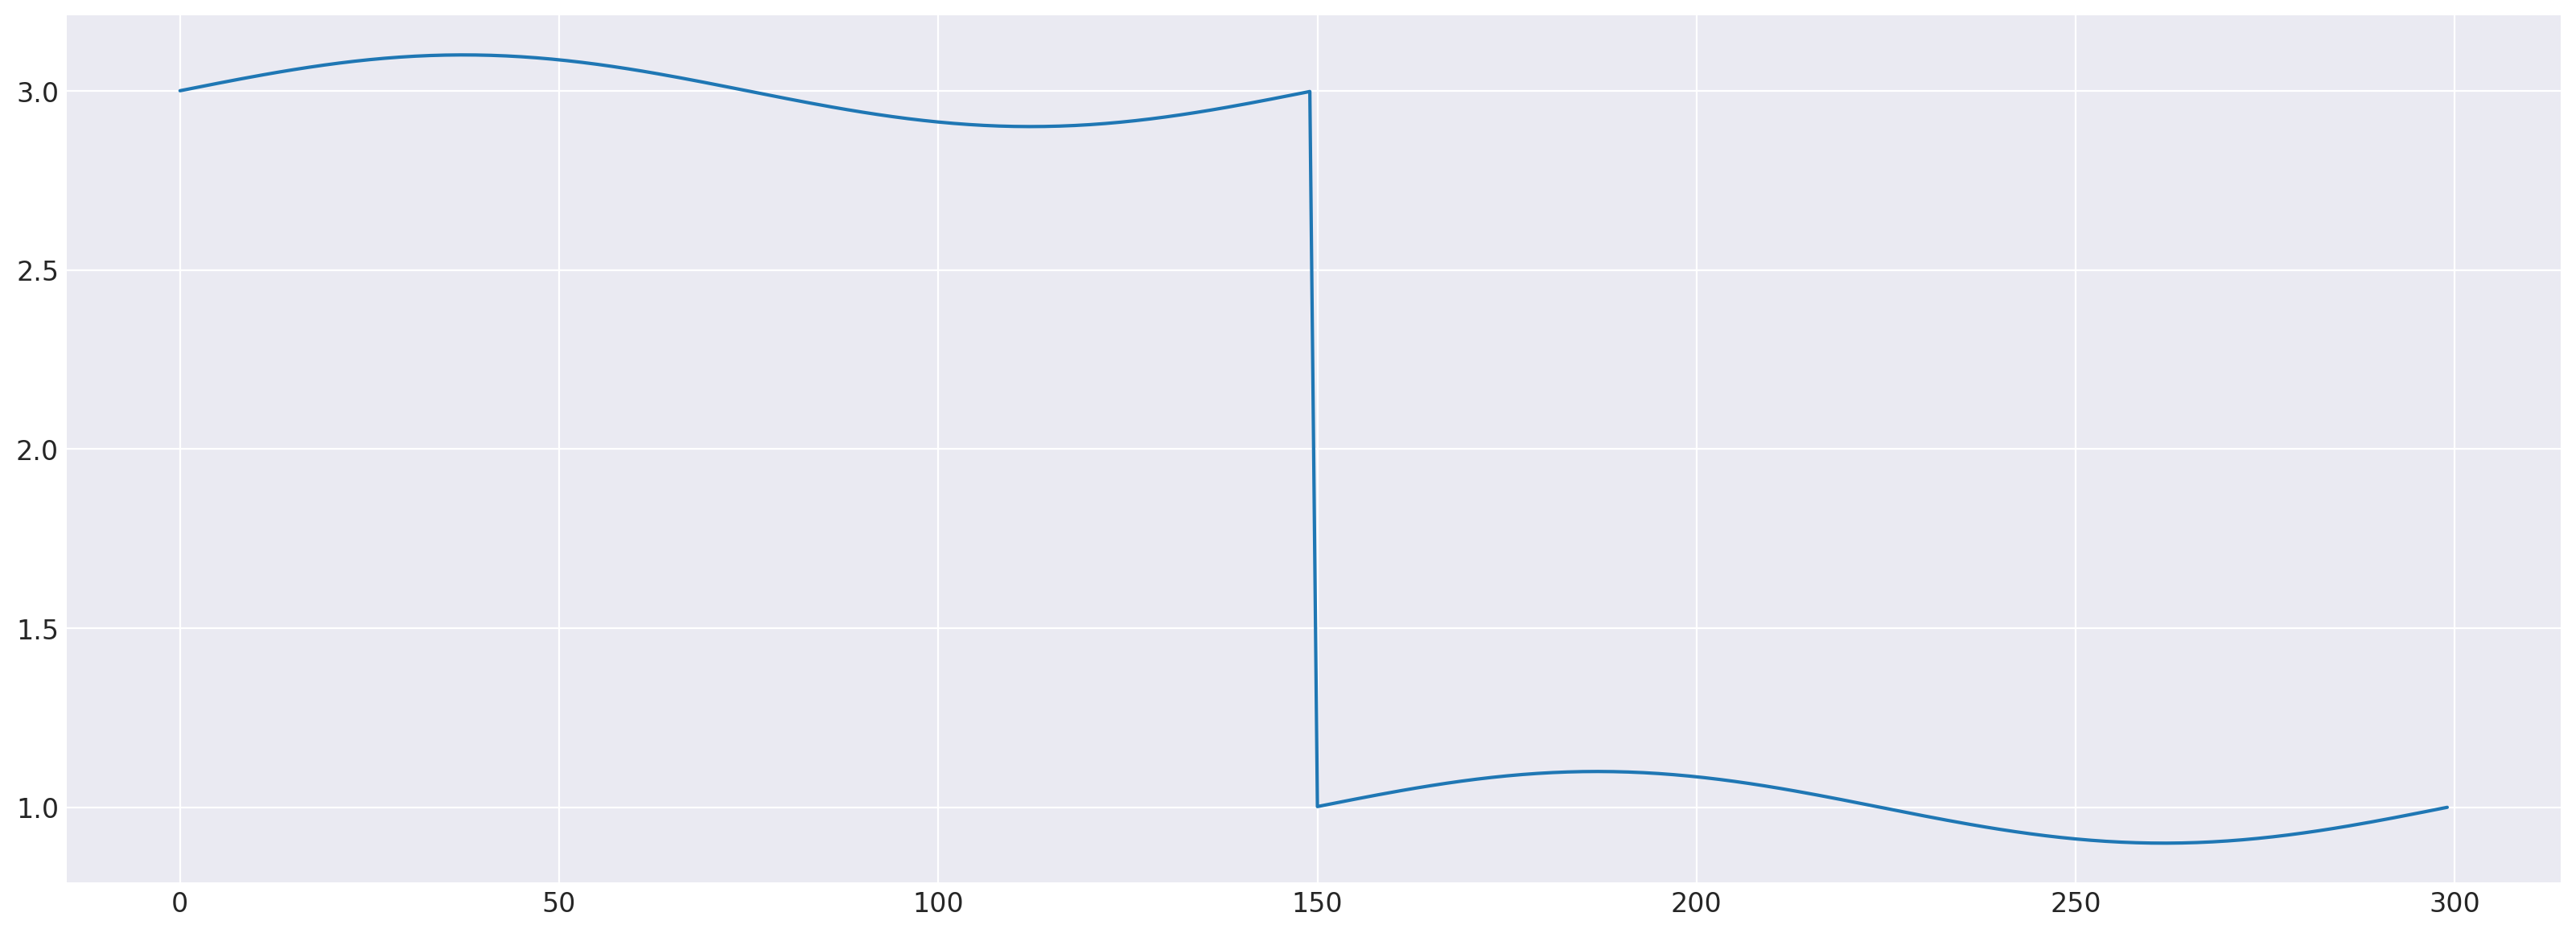

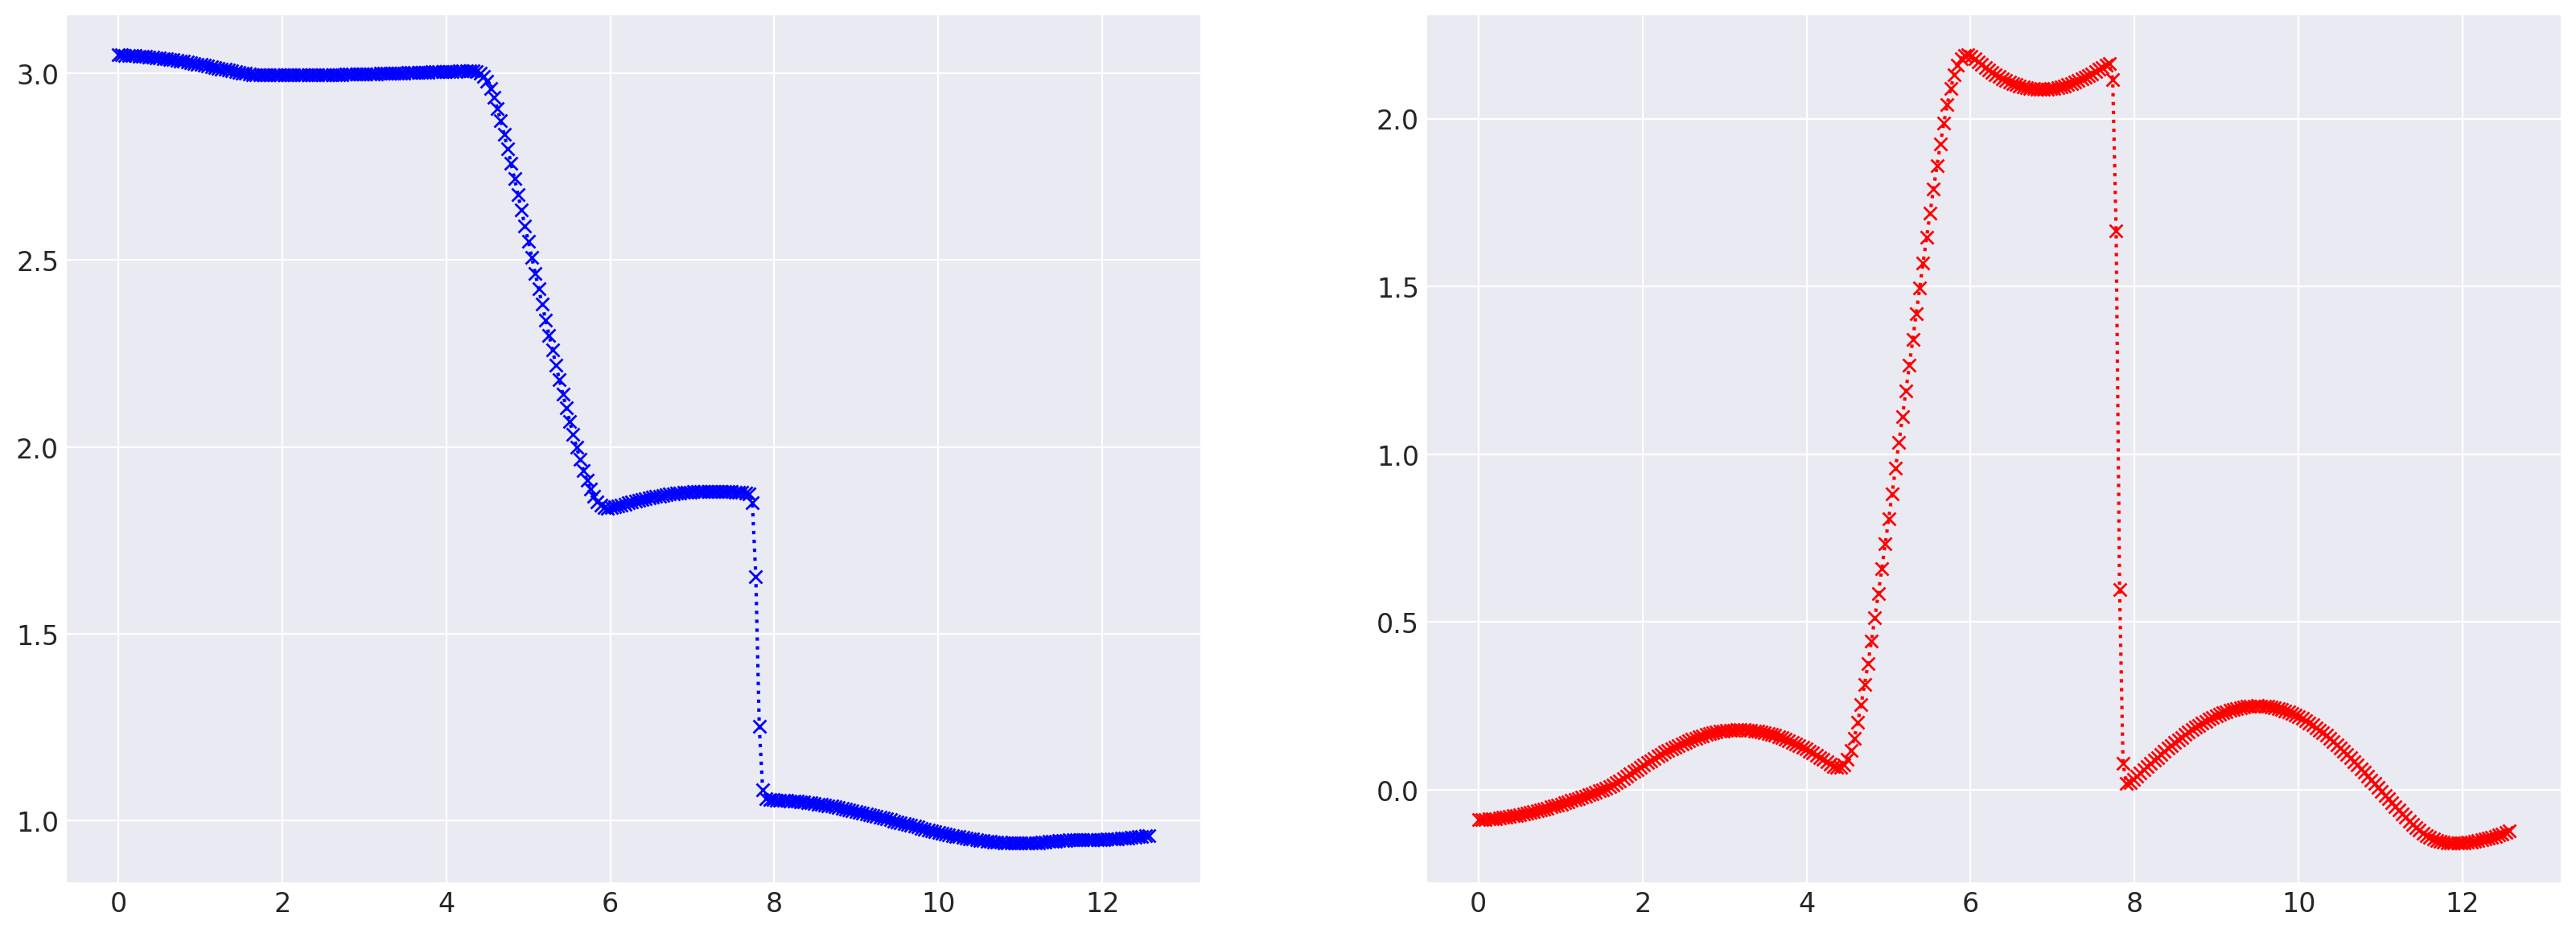

In [15]:
x_start = 0
x_end = np.pi * 4
Q_init = shallow_ic(300, 4)
plt.plot(Q_init[0])
plt.show()
Qs, x, cfl, E = shallow_sol(Q_init, 
        N = 300,
        x_start = x_start, x_end=x_end,
        T = 0.3,
        exact_q = False,
        plot_sol=True
        )     

## Závěr

- ověřili jsme 
    - Godunov funguje
    - stačí přibližné riemanovy řešiče
    - 1. řád vyhlazuje řešení
    - 2. řád kmitá, ale je přesnější
    - větší N (menší dx) zpřesňuje řešení
    - CFL podmínka musí (až na vyjímky) být pod 1